# Model Comparison 

In [6]:
# first, test generative model on one dimensional graphs
import sys
import seaborn as sns
sys.path.append('../HCM')
from main import *
import matplotlib.pyplot as plt

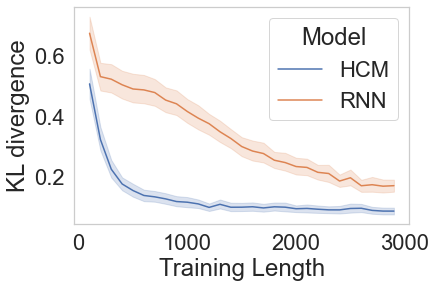

In [9]:
# sns.set_theme(style="ticks")
# sns.set_style(style='white')
sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})
df = pd.read_csv('../OutputData/KL_rational_learning_N')
# print(df)
ax = sns.lineplot(x="N", y="kl", hue = 'type',legend = False,
             data=df)
ax.set(ylabel='KL divergence', xlabel='Training Length')
plt.legend(title='Model', labels=['HCM', 'RNN'])

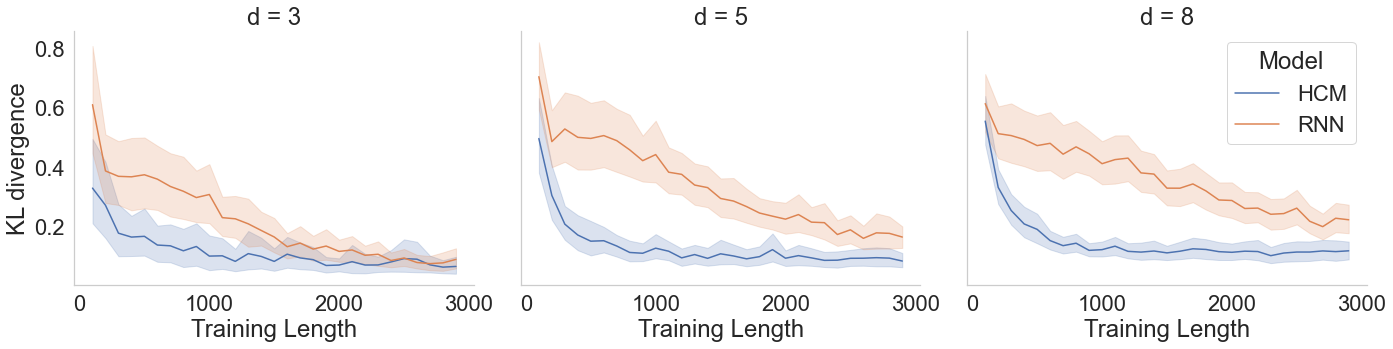

In [10]:
dfp = df[(df['d']==3)| (df['d']==5)|(df['d']==8)]

sns.set(font_scale = 2)
sns.set_style("whitegrid", {'axes.grid' : False})

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
ax = sns.relplot(
    data=dfp,
    x="N", y="kl",
    hue="type", col="d",
    kind="line",size_order=["T1", "T2"],
    legend = False,
    height=5, aspect=1.3, facet_kws=dict(sharex=True),
)
ax.set(ylabel='KL divergence', xlabel='Training Length')
plt.legend(title='Model', labels=['HCM', 'RNN'])